# (a) Bessel Functions

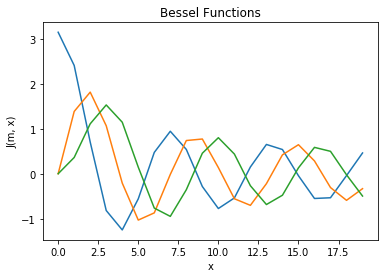

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin
N = 1000

def f(m, x, theta):
    return cos(m*theta - x*sin(theta))

def J(m,x):
    s = 0.5*(f(m,x,pi) + f(m,x,0))
    dtheta = pi/N
    for i in range(N):
        s += f(m,x,i*dtheta)
    return s*dtheta

j0 = []
j1 = []
j2 = []
xi = []

for x in range(0,20):
    j0.append(J(0, x))
    j1.append(J(1, x))
    j2.append(J(2, x))
    xi.append(x)
plt.title("Bessel Functions")
plt.xlabel("x")
plt.ylabel("J(m, x)")
plt.plot(xi, j0)
plt.plot(xi, j1)
plt.plot(xi, j2)
plt.show()

# (b) Diffraction

Populating the interactive namespace from numpy and matplotlib


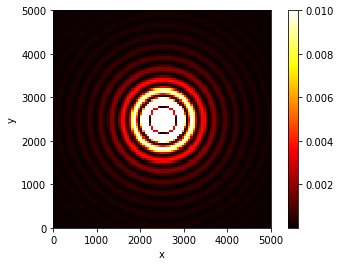

In [41]:
# Enter code here that calculates and plots the diffraction pattern
%pylab inline
from pylab import imshow,show,xlabel, ylabel, colorbar
from math import pi, cos, sin, sqrt
from numpy import empty
N =1000
wavelength = 500  ##wavelength
k = 2*pi / wavelength 
sep = 20.0
dim = 5000.0
points = 100
spacing = dim / points

A = empty([points, points], float)

def f(m, x, theta):
    return cos(m*theta - x*sin(theta))

def J(m,x):
    s = 0.5*(f(m,x,pi) + f(m,x,0))
    dtheta = pi/N
    for i in range(N):
        s += f(m,x,i*dtheta)
    return s*dtheta

def intensity(r):
    k = 2*pi / wavelength
    if r == 0:
        return float('inf')
    return (J(1, k*r) / (k*r))**2

for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r = sqrt((x-2500)**2 + (y-2500)**2)
        A[i, j] = intensity(r)
imshow(A, extent=[0, dim, 0, dim], vmax=0.01)
colorbar()
xlabel("x")
ylabel("y")
hot()